# 探索的データ分析授業課題 信用情報の分析

# 1.このテキストについて

### テキストの目的
- 実データに近いものの分析を行う
- データセットに対して自ら課題を設定できるようにする

### どのように学ぶか
Kaggleのデータセットを通じて、データ分析の流れやライブラリの使い方を学びます。

## 2.信用情報  
Kaggleの Home Credit Default Risk コンペティションを活用し、実データに近いものに対し、自ら課題を設定して分析する練習を行います。  
Home Credit Default Risk | Kaggle  
https://www.kaggle.com/c/home-credit-default-risk  
Week4では機械学習手法を用いて学習・推定を行います。その準備としてWeek3でデータ探索（EDA）を行います。

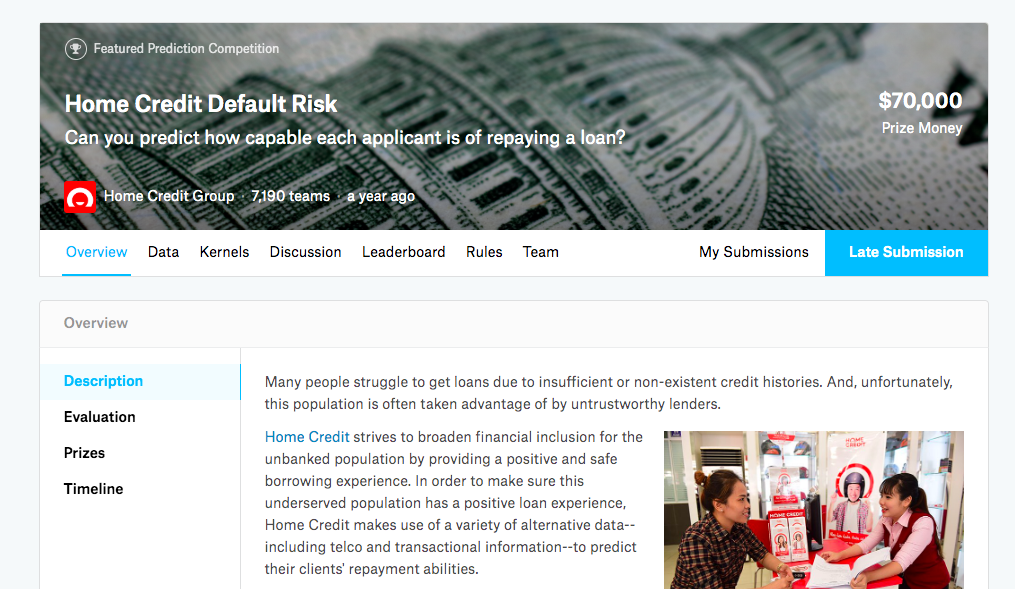

## 【問題1】コンペティション内容の把握
コンペティションのOverviewページ読み、「Home Credit Default Risk」はどのようなコンペティションか、以下の観点からレポートしてください。


1. Home Creditはどのような企業？  
2. このコンペティションでは何を予測する？  
3. それを予測することで企業が得られるメリットは何？

### データセットの準備
分析対象のデータセットはコンペティションのDataページからapplication_train.csvをダウンロードして使用します。


また同ページ内にあるHomeCredit_columns_description.csvは、データセットに関する説明となっています。


Dataページ内の他のcsvファイルはこの課題では扱いません。


Notebooksについて
コンペティションのNotebooksページで公開されているものを活用してください。


**《推奨参考Notebooks》**


Home Credit Default Risk Extensive EDA | Kaggle  
https://www.kaggle.com/gpreda/home-credit-default-risk-extensive-eda


HomeCreditRisk: Extensive EDA + Baseline [0.772] | Kaggle  
https://www.kaggle.com/shivamb/homecreditrisk-extensive-eda-baseline-0-772


HomeCreditRisk : Extensive EDA + Baseline Model JP | Kaggle  
https://www.kaggle.com/osciiart/homecreditrisk-extensive-eda-baseline-model-jp


この他タイトルにEDAと付いているものを参考にしてください。

### 1.1.1（解答）　Home　Creditはどのような企業？

Home Credit BVは、1997年にチェコ共和国で設立され、オランダに本社を置く国際的なノンバンク金融機関です。  
同社は10か国で事業を展開しており、主に信用履歴がほとんどまたはまったくない人々への融資に重点を置いています。

https://en.wikipedia.org/wiki/Home_Credit

### 1.2.1（解答）このコンペティションでは何を予測する？

目的は、過去のローン申請データを使用して、申請者がローンを返済できるかどうかを予測することです。  
評価にはROC曲線を利用される。受信者動作特性（ROC）曲線は、真陽性率と偽陽性率をグラフ化したものです。

### 1.3.1（解答） それを予測することで企業が得られるメリットは何？

クライアントの返済能力を予測することで、Kagglersがデータの可能性を最大限に引き出す手助けをするように挑戦しています。  
そうすることで、返済可能なクライアントが拒否されないようにし、クライアントが成功するための元本、満期、および返済カレンダーを使用してローンが提供されるようにします。

## 【問題2】データの概観の把握

データの概観を把握するために以下のようなことを行ってください。


- .head()、.info()、describe()などを使う
- 欠損値の有無を見る
- クラスの割合がわかるグラフを描く

それぞれ結果に対する説明や考察も行ってください。

### 2.1.1（解答）.head()、.info()、describe()などを使う

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

In [ ]:
# pdのカラム表示数の確認と変更
pd.get_option("display.max_columns")
pd.set_option("display.max_columns",150)

# # pdのfloat_formatを変更
# pd.options.display.float_format = "{:.1f}%".format

In [ ]:
#訓練データの読み込み
train = pd.read_csv("home-credit-default-risk/application_train.csv")
test = pd.read_csv("home-credit-default-risk/application_test.csv")
print(f"{train.shape[0]} row : {train.shape[1]} columns")
train.head()

In [ ]:
train.describe()

In [ ]:
train.info()

顧客データは307511名分あるが、項目によっては半分近く欠損している項目もある。

### 2.2.1（解答）欠損値の有無を見る

In [ ]:
# 欠損値の合計
train.isnull().sum()

In [ ]:
# 正解値と欠損値の数をpandas風に確認
train.isnull().apply(lambda col: col.value_counts(), axis=0).fillna(0).astype(np.int_)

### 2.2.1（予備知識） 欠損値の数と割合

In [ ]:
mis_val = pd.concat([(train.isnull().sum()), (100 * train.isnull().sum() / len(train))], axis=1)
mis_val_table = mis_val.rename(columns = {0 : '欠損数', 1 : '欠損率'}).sort_values("欠損率", ascending=False)
mis_val_table.head(10)

上記の参考資料　https://newtechnologylifestyle.net/python_detanan/

### 2.3.1（解答）クラスの割合がわかるグラフを描く

In [ ]:
def pie(data):   
    plt.pie(data[0].value_counts(), labels=data[2], autopct="%1.1f%%", counterclock=False, startangle =90)
    plt.title(data[1], fontsize = 22)
    plt.rcParams['font.size'] = 16.0

In [ ]:
data =[train["TARGET"], "TARGET", ["no problem", "problem"]]
pie(data)

返済に問題がある顧客は全体の１割に満たない。

In [ ]:
data =[train["NAME_CONTRACT_TYPE"], "NAME_CONTRACT_TYPE", ["cash loans", "Revolving loans"]]
pie(data)

リボ払いの利用者は１割程度。

In [ ]:
data =[train["CODE_GENDER"], "CODE_GENDER", ["woman", "man", "X"]]
pie(data)

女性が6.6割を占める、ごく少数でどちらにも属さない値が含まれている。

## 【問題3】課題設定
データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

### 3.1.1 解答

In [ ]:
df_matrix = abs(train.corr()["TARGET"].sort_values()) #相関関係を算出
print(f"ターゲットと相関関係が強い上位10位\n{df_matrix.head(15)}")

外部データソースが圧倒的な関係性で上位を独占。
また5〜7位、10~14位は居住に関する正規化されたデータが順位の大半を占める。
その他データとしては４位に雇用期間、８位は消費者ローンを組んでいる価格がランクイン。
上記以外では年齢層も関係して来ると思われるので、次の項目で確認する。

## 【問題4】データ探索
問題3で設定した課題・疑問を解決するためにデータ探索を進めます。探索で使用する表やグラフを、考察と共に 15個以上 作成してください。  
探索過程で新しい疑問点が生まれた場合は、問題3の回答に加えていってください。

### 4.1.1 年齢層との関係性

In [ ]:
# 年齢データの分布(日→年)
print("YEARS_BIRTH_DATA")
(train['DAYS_BIRTH'] / -365).describe()

In [ ]:
# 顧客年齢層の分布（1目盛りあたり2.5年）
plt.hist(train["DAYS_BIRTH"] / -365, edgecolor = 'k', bins = 25)
plt.title('Age of Client'); plt.xlabel('Age (years)'); plt.ylabel('Count');

In [ ]:
# 問題有無の顧客年齢層の割合（カーネル密度曲線）
plt.figure(figsize = (6, 4))
sns.kdeplot(train.loc[train['TARGET'] == 0, 'DAYS_BIRTH'] / -365, label = 'target == 0')
sns.kdeplot(train.loc[train['TARGET'] == 1, 'DAYS_BIRTH'] / -365, label = 'target == 1')

plt.xlabel('Age (years)'); plt.ylabel('Density'); plt.title('Distribution of Ages');

In [ ]:
train['YEARS_BUIRTH'] = abs(train['DAYS_BIRTH'])/365

age_data = train[['TARGET','YEARS_BUIRTH']]
age_data.head()

In [ ]:
age_data['YEARS_BINNED'] = pd.cut(age_data['YEARS_BUIRTH'],bins = np.linspace(20,70,11))

age_data

In [ ]:
age_groups = age_data.groupby('YEARS_BINNED').mean()
age_groups

In [ ]:
plt.bar(age_groups.index.astype(str), 100 * age_groups['TARGET'])
plt.xticks(rotation = 60); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)'); plt.title('Failure to Repay by Age Group');

問題がある顧客は年齢層が若くなるにつれて増える傾向にある。逆に年配の方程問題がある顧客は少ない傾向です。  
40歳を基準に問題のある方も割合は減少する。

### 4.2.1 雇用期間との関係性

In [ ]:
# 雇用年数の分布（日→年)
print("Employment_days_DATA")
abs((train['DAYS_EMPLOYED']) / 365).describe()

最大値1000年雇用という明らかな間違いが含まれるため、正しい計算が出来ないのでこの値を含まずに計算。  
↓↓

In [ ]:
print(f"雇用期間に記載のある人数:{train['DAYS_EMPLOYED'].shape[0]}名")

In [ ]:
print(f"最大の雇用期間は:{train['DAYS_EMPLOYED'].max()}日間")

In [ ]:
print(f"雇用期間が365253の人数: {train[train['DAYS_EMPLOYED'] == 365243].shape[0]}名")

In [ ]:
# 雇用期間の集計においてのみエラー値を削除
train_employed = train[train['DAYS_EMPLOYED'] != 365243]
print(f"雇用期間が不正な方を除いた人数：{train_employed.shape[0]}名")

In [ ]:
# 不正な雇用期間を除く、雇用年数の分布（日→年)
print("Employment_days_DATA")
(train_employed['DAYS_EMPLOYED'] /  -365).describe()

In [ ]:
# 雇用期間の分布（1目盛りあたり2.5年）
plt.hist(train_employed['DAYS_EMPLOYED'] / -365, edgecolor = 'k', bins = 25)
plt.title('EMPLOYED of Client'); plt.xlabel('EMPLOYED (years)'); plt.ylabel('Count');

In [ ]:
# 問題有無の顧客年齢層の割合（カーネル密度曲線）
plt.figure(figsize = (6, 4))
sns.kdeplot(train_employed.loc[train_employed['TARGET'] == 0, 'DAYS_EMPLOYED'] / -365, label = 'target == 0')
sns.kdeplot(train_employed.loc[train_employed['TARGET'] == 1, 'DAYS_EMPLOYED'] / -365, label = 'target == 1')

plt.xlabel('EMPLOYED (years)'); plt.ylabel('Density'); plt.title('Distribution of EMPLOYED');

In [ ]:
train['YEARS_EMPLOYED'] = abs(train_employed['DAYS_EMPLOYED'])/365

EMPLOYED_data = train[['TARGET','YEARS_EMPLOYED']]
EMPLOYED_data['YEARS_BINNED'] = pd.cut(EMPLOYED_data['YEARS_EMPLOYED'],bins = np.linspace(0,50,11))

EMPLOYED_data

In [ ]:
EMPLOYED_data_groups = EMPLOYED_data.groupby('YEARS_BINNED').mean()
EMPLOYED_data_groups

In [ ]:
plt.bar(EMPLOYED_data_groups.index.astype(str), 100 * EMPLOYED_data_groups['TARGET'])
plt.xticks(rotation = 60); plt.xlabel('Age Group (years)'); plt.ylabel('Failure to Repay (%)'); plt.title('Failure to Repay by Age Group');

雇用５年以内に問題のある顧客が多い。５年ぐらいをピークをその後著しく減少し、7~8年目以降は全体の基準値を下回る傾向が見られる。

### 4.3.1 EXT_SOURCEの関係性

In [ ]:
ext_data = train[['TARGET', 'EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH']]
ext_data_corrs = ext_data.corr()
ext_data_corrs

In [ ]:
plt.figure(figsize = (8, 6))

sns.heatmap(ext_data_corrs, cmap = plt.cm.RdYlBu_r, vmin = -0.25, annot = True, vmax = 0.6)
plt.title('Correlation Heatmap');

DAYS_BIRTHとEXT_SOURCE_1で正の相関関係があるので、EXT_SOURCE_1の値には年齢が関わっていると思われます。
ターゲットとEXT_SOURCE_1〜３は、互いに非常に弱い負の相関関係があり、SOURCEの値が高くなることにつれて、顧客がローンを返済する可能性が高くなることを示していると思います。

In [ ]:
plt.figure(figsize = (10, 12))

for i, source in enumerate(['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3']):
    plt.subplot(3, 1, i + 1)
    sns.kdeplot(train.loc[train['TARGET'] == 0, source], label = 'target == 0')
    sns.kdeplot(train.loc[train['TARGET'] == 1, source], label = 'target == 1')

    plt.title('Distribution of %s by Target Value' % source)
    plt.xlabel('%s' % source); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

EXT_SOURCE_1は年齢層毎の関係性でみたグラフによく似た形をしている。  
３つのグラフを合わせるとEXT_SOURCE_3のグラフに近い形になりそうなことから、EXT_SOURCE_1とEXT_SOURCE_2はEXT_SOURCE_3に影響を与えていると思われる。

### 4.4.1 多項式特徴形状を使用したトレーニングデータ

In [ ]:
poly_features = train[['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH', 'TARGET']]

# 欠損値を補完
from sklearn.impute import SimpleImputer
# 平均値で穴埋め
imputer = SimpleImputer(strategy = 'median')
poly_target = poly_features['TARGET']
poly_features = poly_features.drop(columns = ['TARGET'])
poly_features = imputer.fit_transform(poly_features)

from sklearn.preprocessing import PolynomialFeatures

# 3次（までの）変数を作成するインスタンス
poly_transformer = PolynomialFeatures(degree = 3)

In [ ]:
poly_transformer.fit(poly_features)

poly_features = poly_transformer.transform(poly_features)
print('Polynomial Features shape: ', poly_features.shape)

In [ ]:
poly_transformer.get_feature_names(input_features = ['EXT_SOURCE_1', 'EXT_SOURCE_2', 'EXT_SOURCE_3', 'DAYS_BIRTH'])[:15]

In [ ]:
poly_features = pd.DataFrame(poly_features, 
                             columns = poly_transformer.get_feature_names(['EXT_SOURCE_1', 'EXT_SOURCE_2', 
                                                                           'EXT_SOURCE_3', 'DAYS_BIRTH']))

poly_features['TARGET'] = poly_target
poly_corrs = poly_features.corr()['TARGET'].sort_values()

print(poly_corrs.head(10))
print(poly_corrs.tail(5))

In [ ]:
poly_features['SK_ID_CURR'] = train['SK_ID_CURR']
train_poly = train.merge(poly_features, on = 'SK_ID_CURR', how = 'left')

print('多項式特徴形状を使用したトレーニングデータ: ', train_poly.shape)

### 4.5.1 特徴を組み合わせて新たな特徴量を確認

In [ ]:
train_domain = train.copy()

train_domain['CREDIT_INCOME_PERCENT'] = train_domain['AMT_CREDIT'] / train_domain['AMT_INCOME_TOTAL']
ｔrain_domain['ANNUITY_INCOME_PERCENT'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_INCOME_TOTAL']
train_domain['CREDIT_TERM'] = train_domain['AMT_ANNUITY'] / train_domain['AMT_CREDIT']
train_domain['DAYS_EMPLOYED_PERCENT'] = train_domain['DAYS_EMPLOYED'] / train_domain['DAYS_BIRTH']

In [ ]:
plt.figure(figsize = (12, 20))
for i, feature in enumerate(['CREDIT_INCOME_PERCENT', 'ANNUITY_INCOME_PERCENT', 'CREDIT_TERM', 'DAYS_EMPLOYED_PERCENT']):
    plt.subplot(4, 1, i + 1)
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 0, feature], label = 'target == 0')
    sns.kdeplot(train_domain.loc[train_domain['TARGET'] == 1, feature], label = 'target == 1')
    
    plt.title('Distribution of %s by Target Value' % feature)
    plt.xlabel('%s' % feature); plt.ylabel('Density');
    
plt.tight_layout(h_pad = 2.5)

### 4.6.1（予備知識） エンコーディング

エンコーディングはよく用いられる定番の手法から次元を増やすかどうかで大まかに次の２つに分類できる。
- 次元を増やさない場合（Label, Count, LabelCount, Target）
- 次元を増やす場合（One-Hot, Entity Embedding）

In [ ]:
# Label Encoding
# 最もシンプルな手法で、与えられたカテゴリ変数に数字を割り当てるもの

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le_count = 0

for col in train:
    if train[col].dtype == 'object':
        # If 2 or fewer unique categories
        if len(list(train[col].unique())) <= 2:
            # Train on the training data
            le.fit(train[col])
            # Transform both training and testing data
            train[col] = le.transform(train[col])
            # Keep track of how many columns were label encoded
            le_count += 1
            
print('%d columns were label encoded.' % le_count)

In [ ]:
train.shape

In [ ]:
# one-hot encoding
# データ中に存在するカテゴリ変数の数だけ次元（構造化データでいうと、新しい列）を用意して、
#各行に含まれているカテゴリ変数に対応する次元を１に、それ以外を0にする方法。

train_df = pd.get_dummies(train)
print('訓練データの数: ', train_df.shape)

### 4.7.2（予備知識）訓練&検証データの値を合わせる

In [ ]:
train_labels = train['TARGET']

# 訓練データと検証データの両方にあるデータのみ残す
train_sample, test_sample = train.align(test, join = 'inner', axis = 1)

# ターゲットの追加
train_sample['TARGET'] = train_labels

print('訓練データの数: ', train_df.shape)

## 【問題5】（アドバンス課題）Notebooksへの投稿
必須ではありませんが、コンペティションのNotebooksページに今回作成したEDAのノートブックを投稿することを推奨しています。

